## Setup Target Board

In [1]:
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET = 'NONE'
SS_VER = 'SS_VER_1_1'

## Detect Chipwhisperer Board

In [2]:
import time
import chipwhisperer as cw

scope = cw.scope()

target_type = cw.targets.SimpleSerial
try:
    target = cw.target(scope, target_type)
except:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope, target_type)

print("INFO: Found ChipWhisperer😍")

prog = cw.programmers.STM32FProgrammer

time.sleep(0.05)
scope.default_setup()
def reset_target(scope):
    scope.io.nrst = 'low'
    time.sleep(0.05)
    scope.io.nrst = 'high_z'
    time.sleep(0.05)


INFO: Found ChipWhisperer😍


## Compile
There are some warnings (for now). 

In [3]:
%%bash -s "$SS_VER" "$PLATFORM" "$CRYPTO_TARGET"
rm -rf objdir-$2 objdir .dep
make SS_VER=$1 PLATFORM=$2 CRYPTO_TARGET=$3

Building for platform CWLITEARM with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_1_1
rm -f -- simpleserial_sca25519-CWLITEARM.hex
rm -f -- simpleserial_sca25519-CWLITEARM.eep
rm -f -- simpleserial_sca25519-CWLITEARM.cof
rm -f -- simpleserial_sca25519-CWLITEARM.elf
rm -f -- simpleserial_sca25519-CWLITEARM.map
rm -f -- simpleserial_sca25519-CWLITEARM.sym
rm -f -- simpleserial_sca25519-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- main.s test.s crypto/numerics/fe25519.s crypto/numerics/fe25519_invert.s crypto/numerics/sc25519.s crypto/numerics/bigint.s crypto/scalarmult/cSwapAndRandomize.s crypto/scalarmult/scalarmult_25519.s crypto/support/randombytes.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- main.d test.d crypto/numerics/fe25519.d crypto/numerics/fe25519_invert.d crypto/numerics/sc25519.d crypto/numerics/bigint.d crypto/scalarmult/cSwapAndRandomize.d crypto/scalarmult/scalarmult_25519.d crypto/support/randombytes.d simpleserial.d stm3

main.c: In function 'sca25519_test':
main.c:65:12: warning: implicit declaration of function 'test_point' [-Wimplicit-function-declaration]
   65 |   res_dh = test_point();
      |            ^~~~~~~~~~
main.c:61:7: warning: unused variable 'i' [-Wunused-variable]
   61 |   int i;
      |       ^
main.c:60:11: warning: unused variable 'result' [-Wunused-variable]
   60 |   uint8_t result[32];
      |           ^~~~~~
main.c: In function 'sca25519_one':
main.c:87:9: warning: implicit declaration of function 'test_curve25519_static_once'; did you mean 'test_curve25519_static'? [-Wimplicit-function-declaration]
   87 |   res = test_curve25519_static_once();
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~
      |         test_curve25519_static
main.c:83:7: warning: unused variable 'i' [-Wunused-variable]
   83 |   int i;
      |       ^
main.c:82:11: warning: unused variable 'result' [-Wunused-variable]
   82 |   uint8_t result[32];
      |           ^~~~~~


.
Compiling C: test.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/test.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/test.o.d test.c -o objdir/test.o


test.c:56:5: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   56 | int test_curve25519_static_once() {
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~


.
Compiling C: crypto/numerics/fe25519.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/fe25519.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/fe25519.o.d crypto/numerics/fe25519.c -o objdir/crypto/numerics/fe25519.o
.
Compiling C: crypto/numerics/fe25519_invert.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=co

In file included from .././hal/stm32f3/stm32f3xx_hal_def.h:49,
                 from .././hal/stm32f3/stm32f3xx_hal_rcc.h:47,
                 from .././hal/stm32f3/stm32f3_hal.c:4:
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:452: warning: "GPIO_SPEED_HIGH" redefined
  452 |  #define  GPIO_SPEED_HIGH   GPIO_SPEED_FREQ_HIGH
      | 
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:439: note: this is the location of the previous definition
  439 | #define  GPIO_SPEED_HIGH                          GPIO_SPEED_FREQ_VERY_HIGH
      | 


.
Compiling C: .././hal/stm32f3/stm32f3_hal_lowlevel.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/stm32f3_hal_lowlevel.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/stm32f3_hal_lowlevel.o.d .././hal/stm32f3/stm32f3_hal_lowlevel.c -o objdir/stm32f3_hal_lowlevel.o


In file included from .././hal/stm32f3/stm32f3xx_hal_def.h:49,
                 from .././hal/stm32f3/stm32f3xx_hal_rcc.h:47,
                 from .././hal/stm32f3/stm32f3_hal_lowlevel.c:40:
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:452: warning: "GPIO_SPEED_HIGH" redefined
  452 |  #define  GPIO_SPEED_HIGH   GPIO_SPEED_FREQ_HIGH
      | 
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:439: note: this is the location of the previous definition
  439 | #define  GPIO_SPEED_HIGH                          GPIO_SPEED_FREQ_VERY_HIGH
      | 


.
Compiling C: .././hal/stm32f3/stm32f3_sysmem.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/stm32f3_sysmem.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/stm32f3_sysmem.o.d .././hal/stm32f3/stm32f3_sysmem.c -o objdir/stm32f3_sysmem.o
.
Assembling: crypto/asm/cortex_m4_sqr_fe25519.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_C

.
Creating load file for EEPROM: simpleserial_sca25519-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial_sca25519-CWLITEARM.elf simpleserial_sca25519-CWLITEARM.eep || exit 0
.
Creating Extended Listing: simpleserial_sca25519-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z simpleserial_sca25519-CWLITEARM.elf > simpleserial_sca25519-CWLITEARM.lss
.
Creating Symbol Table: simpleserial_sca25519-CWLITEARM.sym
arm-none-eabi-nm -n simpleserial_sca25519-CWLITEARM.elf > simpleserial_sca25519-CWLITEARM.sym
Size after:
   text	   data	    bss	    dec	    hex	filename
  30380	    364	   1452	  32196	   7dc4	simpleserial_sca25519-CWLITEARM.elf
+--------------------------------------------------------
+ Default target does full rebuild each time.
+ Specify buildtarget == allquick == to avoid full rebuild
+--------------------------------------------------------
+-----------------------------

## Flash Binary on the Victim Board

**Note:** If you use a STM32F target board of Revision-02 then you first need to set a specific jumper cable on the UFO board for the following code to work.

For more information have a look here: https://rtfm.newae.com/Targets/UFO%20Targets/CW308T-STM32F/

In [4]:
HEXFILE = "./simpleserial_sca25519-" + PLATFORM + ".hex"
cw.program_target(scope, prog, HEXFILE)

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 30751 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 30751 bytes


## Test software

In [5]:
# Send test signal
CMD_TEST = 'e'

DATA_LEN=16
RESP_LEN=16

target.flush()
msg = bytearray([x for x in range(DATA_LEN)])
scope.arm()
target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)
print("res: {}".format(response))

res: CWbytearray(b'00 01 02 03 04 05 06 07 08 09 0a 0b 0c 0d 0e 0f')


res: CWbytearray(b'53 61 6e 69 74 79 20 63 68 65 63 6b 20 3a 20 30')
2366333


<IPython.core.display.Javascript object>


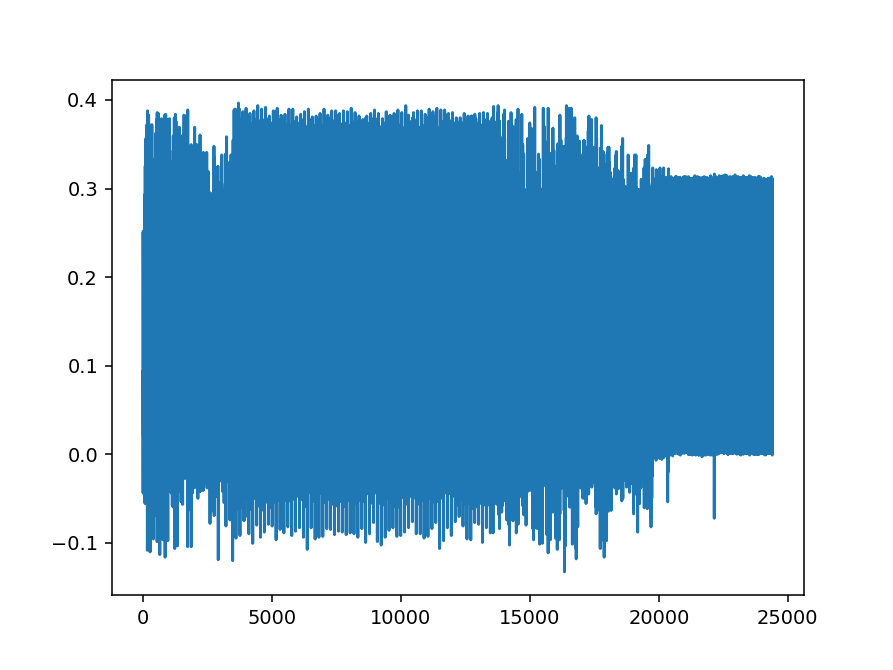

In [6]:
%matplotlib notebook
#%matplotlib notebook
import matplotlib.pyplot as plt
CMD_TEST = 'b'

scope.adc.samples = 24400
scope.adc.decimate = 120
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

target.flush()
msg = bytearray([x for x in range(DATA_LEN)])
scope.arm()
target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)
print("res: {}".format(response))

last_trace = scope.get_last_trace()
print(scope.adc.trig_count)
plt.plot(last_trace)
plt.show()

## Disconnect from Board

In [7]:
scope.dis()
target.dis()